In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk import FreqDist
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)

In [2]:
raw = pd.read_csv('edmunds_forum.csv')
raw['comments'] = raw['comments'].str[1:]
raw.head()

,Unnamed: 0,Date,comments
0,0,"March 24, 2002 10:54PM","I personally think that with a few tweaks the C320 could also sit at the top of this group. It's still more of a entry-level luxury sedan than Mercedes would lead you to believe. The C320 ""Sport"" needs to have it's suspension retuned to accept 17 inch tires without a harsh ride. MB also needs to stop forcing metal trim and black leather on everyone that wants the sport package. The C240's 6-speed wouldn't hurt either if offered on the C320, though it needs to be ""fixed"" first. That said, my favorite of the group is (gasp!) the new A4 3.0. The A4 easily has the best interior of any sub-40K car, combine that with stunning looks and a body that is as rigid as any ever made and you have my personal favorite. The single thing I don't like about the A4 is the grey trim around the bottom of the car. This trim doesn't match any of the body colors, as it should be body color anyway. This is an excellent car and in my opinion the best there is under 40K. The upcoming A4 Convertible, Coupe and S4 WILL all be winners. The BMW 330i is now an old favorite, but I'm (of all people) starting to tire of the 3-Series just a bit, save the M3 variants. I was kind of dissappointed by the 2002 facelift, they could have done a little more in the way of styling. I hope they do a little more for 2003 with the coupe models. The Acura TL-S is easily my favorite fwd car in this class. Wonderful engine (you actually can hear it) and decent handling for a front driver. Nice price, seats and what not, not hard to see why the TL is so popular. This car's main faults are styling and obvious cost-cutting in the interior, stereo, fake wood etc. Otherwise a standout. Lexus ES300. Nice, but not my type of car at all. This is one for the Buick set. The IS300 is half baked, but has a wonderful chassis. Styling is also in question here, it simply doesn't look like a 35K car (grown). The interior is gawd-awful. Bet on the next IS300 being done right from the start. In their defense Toyota didn't initially intend for this car to be sold in the U.S. so it was a rush job. The CTS holds the greatest unrealized potential here. I've seen several now, and each time I see one they look better and better. Again like the C320, IS300 the car has interior issues. The dash feels like it was made by Rubbermaid. If you're going to be stingy with wood trim, why bother? Half of the steering wheel in wood, and very little anywhere else in the car??? The seats are very good though, as is the handling. A work in progress. The G35 looks like it may have a winning chassis, but the interior, though clean looking seems to be styled about 10 years ago, lots of square shapes and flat surfaces. Another great engine, waiting to drive this one.Don't really care much for the X-Type. If I were a Jaguar man I'd be truly pissed at Ford and Jaguar for this one. They are actually selling a fwd X-Type in England and I've read where they're thinking about selling it here! Hell no. The car should have been rwd not awd. Some will tell you that this was done to compete with Audi. Thats BS, awd was the only way to keep the car from being fwd, WITHOUT spending the money to convert the car to rwd. It is a good looking car though and that Jaguar ""leaper"" will be enough for some, but this car has to grow on me. The Chrysler 300M is about as close to an Audi that American cars come. This new 300M ""Special"" is truly a good looking car inside and out. One problem: Where is the performance???? A 255hp car *in this class) with a 0-60 time over 8 seconds is not accpetable. Something is not right here. Some say engine, transmission and/or gearing, but whatever it is, Chrysler needs to let some MB engineers have a look at this car. The heavier E320 with less power is faster. I still like this car, but it's no lust object once you get past the great styling. M"
1,1,"March 25, 2002 12:06AM",I am debating a new purchase and these two are at the top of my list.

In [3]:
def punctuation_extermination(s):
    o = str.maketrans('', '', string.punctuation)
    return str(s).translate(o)

raw['comments'] = raw['comments'].apply(punctuation_extermination)
raw.head()

,Unnamed: 0,Date,comments
0,0,"March 24, 2002 10:54PM",I personally think that with a few tweaks the C320 could also sit at the top of this group Its still more of a entrylevel luxury sedan than Mercedes would lead you to believe The C320 Sport needs to have its suspension retuned to accept 17 inch tires without a harsh ride MB also needs to stop forcing metal trim and black leather on everyone that wants the sport package The C240s 6speed wouldnt hurt either if offered on the C320 though it needs to be fixed first That said my favorite of the group is gasp the new A4 30 The A4 easily has the best interior of any sub40K car combine that with stunning looks and a body that is as rigid as any ever made and you have my personal favorite The single thing I dont like about the A4 is the grey trim around the bottom of the car This trim doesnt match any of the body colors as it should be body color anyway This is an excellent car and in my opinion the best there is under 40K The upcoming A4 Convertible Coupe and S4 WILL all be winners The BMW 330i is now an old favorite but Im of all people starting to tire of the 3Series just a bit save the M3 variants I was kind of dissappointed by the 2002 facelift they could have done a little more in the way of styling I hope they do a little more for 2003 with the coupe models The Acura TLS is easily my favorite fwd car in this class Wonderful engine you actually can hear it and decent handling for a front driver Nice price seats and what not not hard to see why the TL is so popular This cars main faults are styling and obvious costcutting in the interior stereo fake wood etc Otherwise a standout Lexus ES300 Nice but not my type of car at all This is one for the Buick set The IS300 is half baked but has a wonderful chassis Styling is also in question here it simply doesnt look like a 35K car grown The interior is gawdawful Bet on the next IS300 being done right from the start In their defense Toyota didnt initially intend for this car to be sold in the US so it was a rush job The CTS holds the greatest unrealized potential here Ive seen several now and each time I see one they look better and better Again like the C320 IS300 the car has interior issues The dash feels like it was made by Rubbermaid If youre going to be stingy with wood trim why bother Half of the steering wheel in wood and very little anywhere else in the car The seats are very good though as is the handling A work in progress The G35 looks like it may have a winning chassis but the interior though clean looking seems to be styled about 10 years ago lots of square shapes and flat surfaces Another great engine waiting to drive this oneDont really care much for the XType If I were a Jaguar man Id be truly pissed at Ford and Jaguar for this one They are actually selling a fwd XType in England and Ive read where theyre thinking about selling it here Hell no The car should have been rwd not awd Some will tell you that this was done to compete with Audi Thats BS awd was the only way to keep the car from being fwd WITHOUT spending the money to convert the car to rwd It is a good looking car though and that Jaguar leaper will be enough for some but this car has to grow on me The Chrysler 300M is about as close to an Audi that American cars come This new 300M Special is truly a good looking car inside and out One problem Where is the performance A 255hp car in this class with a 060 time over 8 seconds is not accpetable Something is not right here Some say engine transmission andor gearing but whatever it is Chrysler needs to let some MB engineers have a look at this car The heavier E320 with less power is faster I still like this car but its no lust object once you get past the great styling M
1,1,"March 25, 2002 12:06AM",I am debating a new purchase and these two are at the top of my list The price difference between these two is approx 6K nonType S Acura Is the ES300 worth 6K over the TL I dont know because I have never owned a TL but 

In [4]:
corpus = ""
for l in raw['comments']:
    l = str(l).lower()
    corpus += l

corpus[:500]

'i personally think that with a few tweaks the c320 could also sit at the top of this group its still more of a entrylevel luxury sedan than mercedes would lead you to believe the c320 sport needs to have its suspension retuned to accept 17 inch tires without a harsh ride mb also needs to stop forcing metal trim and black leather on everyone that wants the sport package the c240s 6speed wouldnt hurt either if offered on the c320 though it needs to be fixed first that said my favorite of the group'

In [5]:
corpus = corpus.split()
corpus[:500]

['i',
 'personally',
 'think',
 'that',
 'with',
 'a',
 'few',
 'tweaks',
 'the',
 'c320',
 'could',
 'also',
 'sit',
 'at',
 'the',
 'top',
 'of',
 'this',
 'group',
 'its',
 'still',
 'more',
 'of',
 'a',
 'entrylevel',
 'luxury',
 'sedan',
 'than',
 'mercedes',
 'would',
 'lead',
 'you',
 'to',
 'believe',
 'the',
 'c320',
 'sport',
 'needs',
 'to',
 'have',
 'its',
 'suspension',
 'retuned',
 'to',
 'accept',
 '17',
 'inch',
 'tires',
 'without',
 'a',
 'harsh',
 'ride',
 'mb',
 'also',
 'needs',
 'to',
 'stop',
 'forcing',
 'metal',
 'trim',
 'and',
 'black',
 'leather',
 'on',
 'everyone',
 'that',
 'wants',
 'the',
 'sport',
 'package',
 'the',
 'c240s',
 '6speed',
 'wouldnt',
 'hurt',
 'either',
 'if',
 'offered',
 'on',
 'the',
 'c320',
 'though',
 'it',
 'needs',
 'to',
 'be',
 'fixed',
 'first',
 'that',
 'said',
 'my',
 'favorite',
 'of',
 'the',
 'group',
 'is',
 'gasp',
 'the',
 'new',
 'a4',
 '30',
 'the',
 'a4',
 'easily',
 'has',
 'the',
 'best',
 'interior',
 'of',
 '

In [24]:
freq = FreqDist(corpus)
words = [element[0] for element in freq.most_common(100)] # words (x axis)
counts = [element[1] for element in freq.most_common(100)] # freqs (y axis)
l = list(range(1,101))

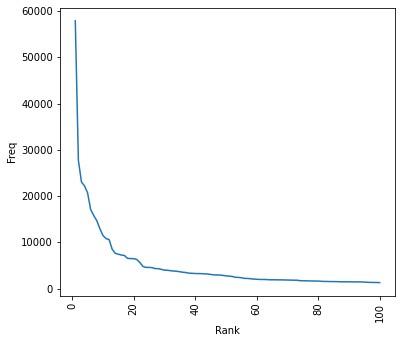

In [27]:
fig = plt.figure()
plt.plot(l, counts)
plt.xlabel('Rank')
plt.ylabel('Freq')
plt.xticks(rotation=90)
fig.subplots_adjust(top=2, bottom=1)
plt.show()